In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 

import cptac
import cptac.utils as u

In [2]:
c1 = cptac.Endometrial()
c2 = cptac.Colon()

In [3]:
cancer1 = "Endometrial"
cancer2 = "Colon"
gene = 'PIK3CA'

In [4]:
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest
prot = c1.get_proteomics()
prot_list = list(prot.columns)
prot_and_mutations = c1.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = prot_list)  

# Step 2 - Create binary column 
prot_and_mutations['binary_mutations'] = np.where(
            prot_and_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
tumors = prot_and_mutations[prot_and_mutations.Sample_Status == 'Tumor'] #drop Normal samples
columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
mut_status = tumors.drop(columns_to_drop, axis = 1)
mut_status = mut_status.dropna(axis=1,how='all')

In [5]:
col_list = list(mut_status.columns)
col_list.remove('binary_mutations')

print("Doing t-test comparisons for", cancer1)

# Call wrap_ttest, pass in formatted dataframe
wrap_results = u.wrap_ttest(mut_status, 'binary_mutations', col_list, return_all=True)

Doing t-test comparisons for Endometrial


C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\core\fromnumeric.py:3367: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\brittany henderson\Anaconda3\envs\Research\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


No significant comparisons.


In [6]:
print(wrap_results.loc[wrap_results['Comparison'] == gene+"_proteomics"])
wrap_results

             Comparison   P_Value
5539  PIK3CA_proteomics  0.031678


,Comparison,P_Value
0,CCDC25_proteomics,0.000858
1,CHST4_proteomics,0.008661
2,CDKL5_proteomics,0.009883
3,CHIC2_proteomics,0.011321
4,CHIT1_proteomics,0.012356
...,...,...
10988,SLK_proteomics,0.998019
10989,STK24_proteomics,0.998245
10990,SYT7_proteomics,0.999208
10991,ZNF704_proteomics,0.999712


In [7]:
# endo ttest
# Step 1 - Create dataframe in order to do comparisons with wrap_ttest
prot2 = c2.get_proteomics()
prot_list2 = list(prot2.columns)
prot_and_mutations = c2.join_omics_to_mutations(
    mutations_genes = [gene], omics_df_name = 'proteomics', omics_genes = prot_list2)  

# Step 2 - Create binary column 
prot_and_mutations['binary_mutations'] = np.where(
            prot_and_mutations[gene+'_Mutation_Status'] == 'Wildtype_Tumor', 'Wildtype', 'Mutated')

# Step 3 - Format the dataframe correctly for the T-test(just omics and binary columns for tumors)
tumors = prot_and_mutations[prot_and_mutations.Sample_Status == 'Tumor'] #drop Normal samples
columns_to_drop = [gene+"_Mutation", gene+"_Location", gene+"_Mutation_Status", "Sample_Status"]
mut_status = tumors.drop(columns_to_drop, axis = 1)
mut_status2 = mut_status.dropna(axis=1,how='all')

In [8]:
col_list2 = list(mut_status2.columns)
col_list2.remove('binary_mutations')

print("Doing t-test comparisons for", cancer2)

# Call wrap_ttest, pass in formatted dataframe
wrap_results2 = u.wrap_ttest(mut_status2, 'binary_mutations', col_list2, return_all=True)

Doing t-test comparisons for Colon
No significant comparisons.


In [9]:
print(wrap_results2.loc[wrap_results2['Comparison'] == gene+"_proteomics"])
wrap_results2

             Comparison   P_Value
5130  PIK3CA_proteomics  0.940923


,Comparison,P_Value
0,DNAJC19_proteomics,0.000020
1,ABHD16A_proteomics,0.000223
2,DDX28_proteomics,0.000454
3,DNAJA3_proteomics,0.000562
4,EEF2_proteomics,0.000735
...,...,...
8062,UIMC1_proteomics,0.990570
8063,MFSD10_proteomics,0.992360
8064,SNX33_proteomics,0.994799
8065,TLN2_proteomics,0.996777


In [10]:
#combine pval results
combined = wrap_results.merge(wrap_results2, on='Comparison')
combined = combined.replace(regex=True,to_replace='_proteomics', value='')

In [11]:
# Green = interacting protein
interacting_list = u.get_interacting_proteins(gene)
combined["color"] = np.where(combined["Comparison"].isin(interacting_list), "green", "black")
print(interacting_list)
#combined.loc[combined['color'] == 'green']

['PIK3R2', 'TNS1', 'RPS6KB1', 'KRAS', 'PDGFRA', 'PIK3R3', 'AKT3', 'PIK3CA', 'ERBB3', 'IGF1R', 'ERBB2', 'EGFR', 'GNAQ', 'KIT', 'MRAS', 'IRS1', 'CTNNB1', 'NRAS', 'PTEN', 'IRS2', 'AKT2', 'CDC42', 'ESR1', 'HRAS', 'PIK3R1', 'AKT1', 'ATR', 'LCK', 'NOTCH1', 'ADAP1', 'DGKZ', 'ARHGEF1', 'GSN', 'YWHAH', 'IRS4', 'UBTF']


In [12]:
limit_x = combined.loc[combined['P_Value_x'] <= .05]
limit_y = combined.loc[combined['P_Value_y'] <= .05]
limit_both = limit_x.loc[limit_x['P_Value_y'] <= .05]
print(limit_both.loc[limit_both['color'] == 'green'])
limit_both

Empty DataFrame
Columns: [Comparison, P_Value_x, P_Value_y, color]
Index: []


,Comparison,P_Value_x,P_Value_y,color
9,CCDC71L,0.025590,0.025662,black
23,DOHH,0.041962,0.021171,black
922,ARPC4,0.009384,0.033598,black
926,ARPC1B,0.031854,0.032022,black
1156,BRI3BP,0.042809,0.004068,black
1271,C8orf33,0.047089,0.030232,black
1751,GDPGP1,0.004350,0.011457,black
1752,HBS1L,0.006187,0.022018,black
1754,FGR,0.010585,0.017199,black
1755,GGCT,0.010841,0.001966,black


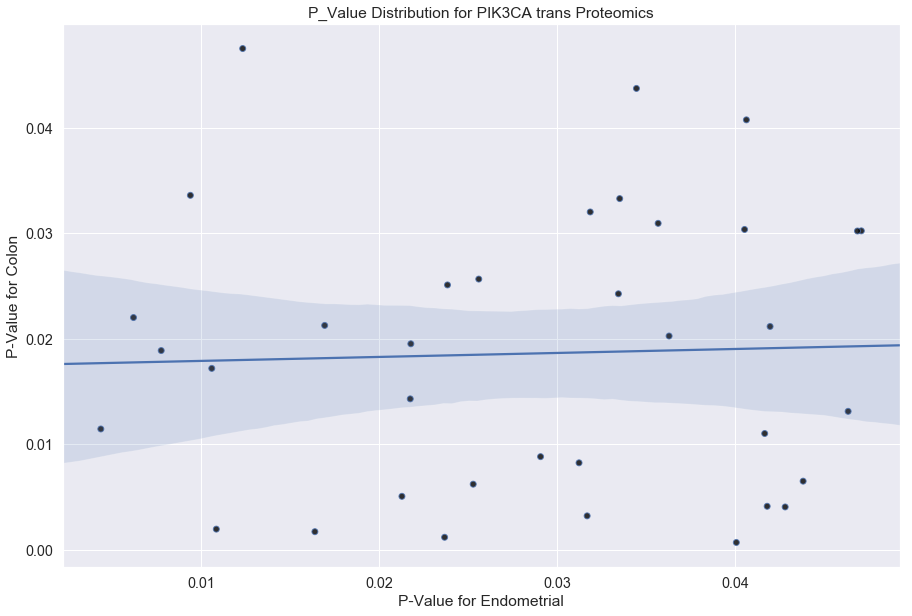

In [13]:
# Format figure size and font
plt.rcParams['figure.figsize']=(15,10)
sns.set(font_scale = 1.3)

# Format title and axis
plot = sns.regplot(x="P_Value_x", y="P_Value_y", data=limit_both, scatter_kws={'facecolors':limit_both['color']})
plot.set_title("P_Value Distribution for "+gene+" trans Proteomics")
plot.set(xlabel = 'P-Value for '+cancer1)
plot.set(ylabel = 'P-Value for '+cancer2)

plt.show()
plt.clf()
plt.close()

PIK3CA: No significant results for endometrial. No significant results for colon. No interacting proteins in graph with alpha = 0.05 borders.